In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Read the dataset
file_path = "ObesityDataSet_raw_and_data_sinthetic.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
# Step 2: Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


,0


In [3]:
# Step 3: Check and remove duplicate rows
duplicate_count = data.duplicated().sum()
data = data.drop_duplicates()
data.shape, duplicate_count


((2087, 17), np.int64(24))

In [4]:
#  Step 4: Relabel the target column into 4 categories
label_map = {
    'Insufficient_Weight': 'Underweight',
    'Normal_Weight': 'Normal',
    'Overweight_Level_I': 'Overweight',
    'Overweight_Level_II': 'Overweight',
    'Obesity_Type_I': 'Obese',
    'Obesity_Type_II': 'Obese',
    'Obesity_Type_III': 'Obese'
}

data['NObeyesdad_4class'] = data['NObeyesdad'].map(label_map)
data[['NObeyesdad', 'NObeyesdad_4class']].head()


,NObeyesdad,NObeyesdad_4class
0,Normal_Weight,Normal
1,Normal_Weight,Normal
2,Normal_Weight,Normal
3,Overweight_Level_I,Overweight
4,Overweight_Level_II,Overweight


In [5]:
# Step 5: Drop the original 7-class target column
data.drop(columns=['NObeyesdad'], inplace=True)
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad_4class
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight


In [7]:
#  Step 6: Encode all categorical columns using Label Encoding
label_encoders = {}
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad_4class
0,0,21,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,0
1,0,21,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,0
2,1,23,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,0
3,1,27,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,2
4,1,22,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,2


In [9]:
#  Step 7: Standardize feature columns using StandardScaler
X = data.drop(columns=['NObeyesdad_4class'])  # features
y = data['NObeyesdad_4class']  # target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,-1.008179,-0.526224,-0.886168,-0.872984,0.460394,-2.754719,-0.788153,0.390854,0.318128,-0.146755,-0.007879,-0.219584,-1.186966,0.554220,1.411836,0.506768
1,-1.008179,-0.526224,-1.958800,-1.178508,0.460394,-2.754719,1.082129,0.390854,0.318128,6.814090,1.636493,4.554073,2.328834,-1.090499,-0.522834,0.506768
2,0.991887,-0.212668,1.044570,-0.376508,0.460394,-2.754719,-0.788153,0.390854,0.318128,-0.146755,-0.007879,-0.219584,1.156901,0.554220,-2.457503,0.506768
3,0.991887,0.414444,1.044570,0.005396,-2.172052,-2.754719,1.082129,0.390854,0.318128,-0.146755,-0.007879,-0.219584,1.156901,-1.090499,-2.457503,1.297220
4,0.991887,-0.369446,0.830044,0.112329,-2.172052,-2.754719,-0.788153,-2.225330,0.318128,-0.146755,-0.007879,-0.219584,-1.186966,-1.090499,-0.522834,0.506768


# Explatory Data Analysis

In [11]:
#  Step 1: Overview of dataset structure and class distribution
dataset_info = data.info()
class_distribution = data['NObeyesdad_4class'].value_counts()

dataset_info, class_distribution


<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   int64  
 1   Age                             2087 non-null   int64  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   int64  
 5   FAVC                            2087 non-null   int64  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   int64  
 9   SMOKE                           2087 non-null   int64  
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   int64  
 12  FAF                             2087 no

(None,
 NObeyesdad_4class
 1    972
 2    566
 0    282
 3    267
 Name: count, dtype: int64)

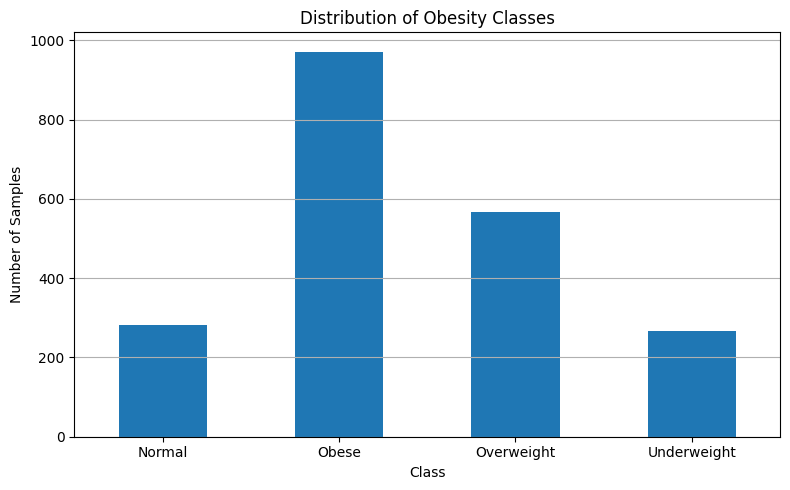

In [13]:
import matplotlib.pyplot as plt

#  Step 2: Plot class distribution of the target column
plt.figure(figsize=(8, 5))
class_names = ['Normal', 'Obese', 'Overweight', 'Underweight']
data['NObeyesdad_4class'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Obesity Classes')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(ticks=range(4), labels=class_names, rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


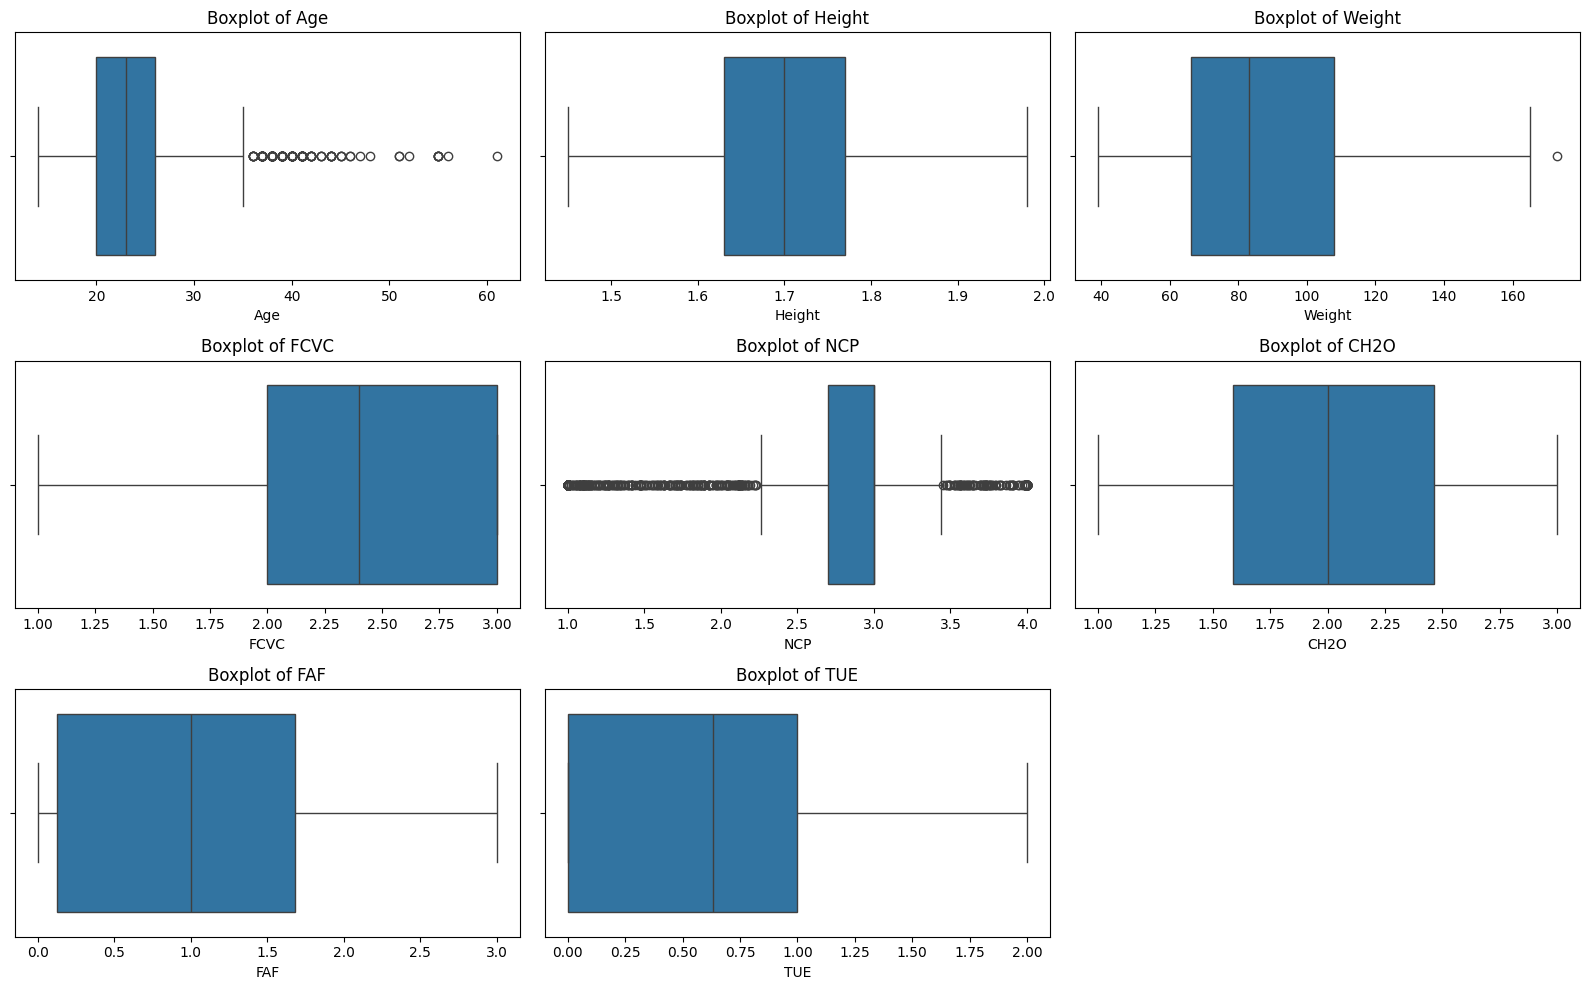

In [14]:
#  Step 3: Check for outliers using boxplots for key numerical features
import seaborn as sns
import matplotlib.pyplot as plt

# Select key numerical columns
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create boxplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


In [15]:
#  Step 4: Remove outliers using the IQR method for selected numerical columns

# Columns to check for outliers
outlier_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create a copy to work on
filtered_data = data.copy()

# Remove outliers for each column
for col in outlier_cols:
    Q1 = filtered_data[col].quantile(0.25)
    Q3 = filtered_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered_data = filtered_data[(filtered_data[col] >= lower) & (filtered_data[col] <= upper)]

# Show new shape
filtered_data.shape


(1384, 17)

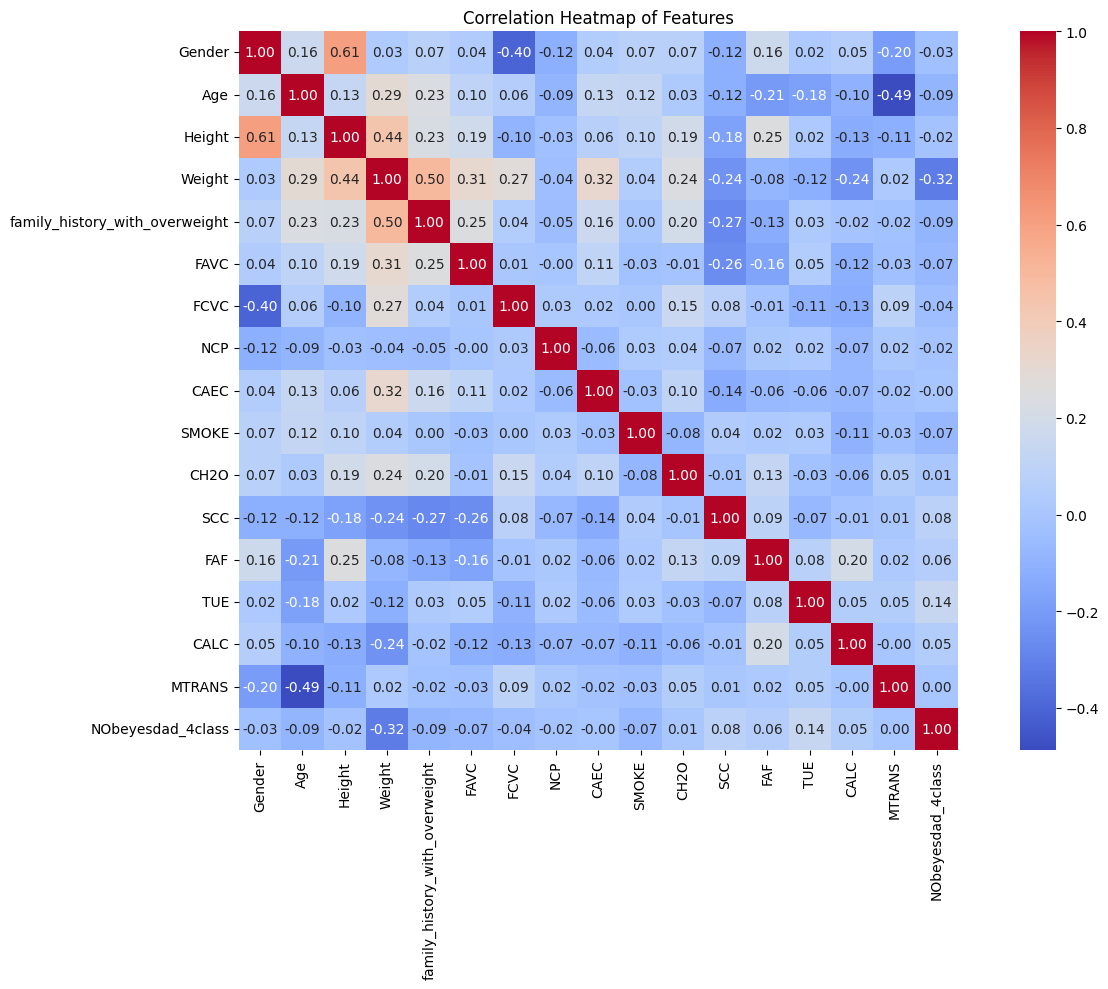

In [17]:
#  Step 5: Correlation heatmap for numerical features
plt.figure(figsize=(14, 10))
correlation_matrix = filtered_data.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()


In [20]:
# ✅  Apply SMOTE to balance classes BEFORE train-test split
from imblearn.over_sampling import SMOTE

# Features and target
X = filtered_data.drop(columns=['NObeyesdad_4class'])
y = filtered_data['NObeyesdad_4class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

# Now split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

# Output the shape and class distribution
(X_train.shape, X_test.shape, y_train.shape, y_test.shape), y_balanced.value_counts()


(((2336, 16), (584, 16), (2336,), (584,)),
 NObeyesdad_4class
 0    730
 2    730
 1    730
 3    730
 Name: count, dtype: int64)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5483 - loss: 1.1465 - val_accuracy: 0.7842 - val_loss: 0.6650
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8451 - loss: 0.5420 - val_accuracy: 0.8459 - val_loss: 0.4354
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9001 - loss: 0.3333 - val_accuracy: 0.9127 - val_loss: 0.3083
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9425 - loss: 0.2311 - val_accuracy: 0.9349 - val_loss: 0.2265
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9624 - loss: 0.1577 - val_accuracy: 0.9606 - val_loss: 0.1681
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9741 - loss: 0.1211 - val_accuracy: 0.9675 - val_loss: 0.1380
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.0939 - val_accuracy: 0.9795 - val_loss: 0.1149
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9888 - loss: 0.0709 - val_accuracy: 0.9846 - val_loss: 0.0918
Ep

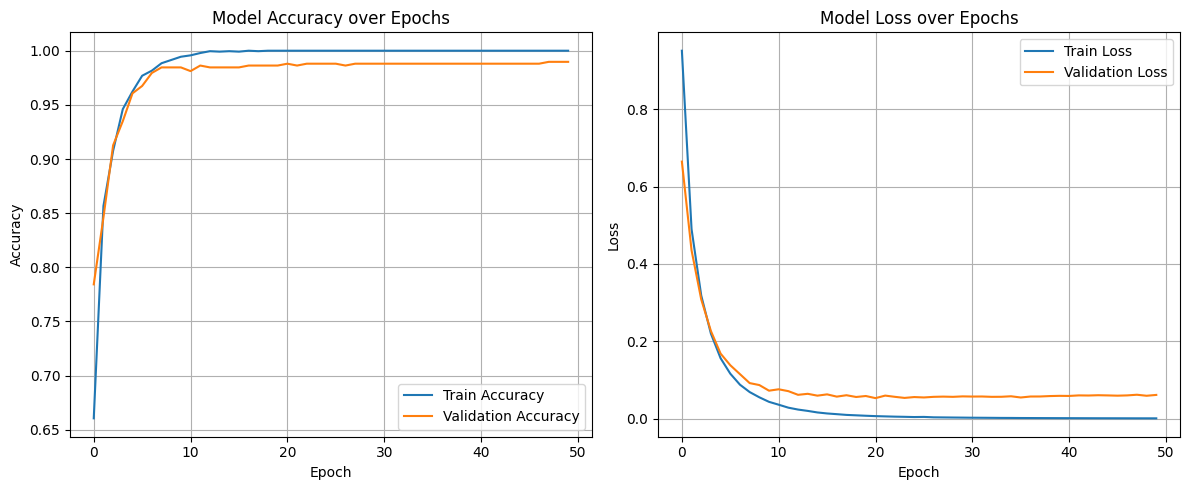

In [27]:
# Train an ANN using Keras for full control over epochs

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Convert target to one-hot encoding
y_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Define ANN model architecture
model = Sequential([
    Dense(100, input_dim=X_train.shape[1], activation='relu'),
    Dense(50, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with verbose epoch tracking
history = model.fit(X_train, y_encoded, validation_data=(X_test, y_test_encoded), epochs=50, batch_size=32, verbose=1)

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       146
           1       1.00      0.99      1.00       146
           2       0.99      0.97      0.98       146
           3       1.00      1.00      1.00       146

    accuracy                           0.99       584
   macro avg       0.99      0.99      0.99       584
weighted avg       0.99      0.99      0.99       584



In [25]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:05:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       146
           1       0.99      1.00      1.00       146
           2       0.98      0.99      0.98       146
           3       1.00      1.00      1.00       146

    accuracy                           0.99       584
   macro avg       0.99      0.99      0.99       584
weighted avg       0.99      0.99      0.99       584

